# HR Attrition Analysis
HR attrition analysis involves studying the rate at which employees leave an organization (turnover) and identifying the underlying causes to improve retention strategies. It typically uses data such as employee demographics (age, gender, education, department, job role), job-related factors (job involvement, work-life balance), and compensation details (monthly income, salary hikes, stock options). The process includes calculating the overall turnover rate and analyzing patterns across these variables using statistical tools and visualizations like bar charts, box plots, and KDE plots. Key insights often reveal that lower income, poor work-life balance, and low job involvement correlate with higher attrition, while higher earners and those with better benefits tend to stay. The goal is to provide actionable recommendations, such as adjusting salaries or enhancing job satisfaction, to reduce turnover and maintain a stable workforce.

## Objective 1: Understand Current Turnover Rates
Goal: Gain a comprehensive understanding of the current employee turnover rate and analyze the demographic distribution of attrition by age, gender, education, department, and job role.

### Analysis of the Document
Turnover Rate: The document emphasizes the importance of understanding employee turnover (attrition) rates. Attrition is a binary variable ("Yes" or "No") in the dataset, indicating whether an employee left the company.
### Demographic Variables:
Age: A numerical variable, likely continuous, representing the employee’s age.<br>
Gender: A categorical variable (e.g., Male, Female).<br>
Education: An ordinal variable with levels 1 to 5 (Below College, College, Bachelor, Master, Doctor).<br>
Department: A categorical variable (e.g., Sales, Research & Development, Human Resources).<br>
Job Role: A categorical variable (e.g., Sales Executive, Research Scientist, Laboratory Technician).<br>

#### Loading Dataset

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv("Attrition.csv")
data.head(5)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


#### Calculating overall Turnover Rate

In [11]:
total_count=data.shape[0]
left_count=data[data['Attrition']=='Yes'].shape[0]
turnover_percentage=(left_count/total_count)*100
print(f"Company-wide Turnover rate:{turnover_percentage:.1f}%")

Company-wide Turnover rate:16.1%


#### Turnover by Category

In [12]:
def get_turnover_by_category(df, category):
    grouped = df.groupby([category, 'Attrition']).size().unstack(fill_value=0)
    turnover_rate = (grouped['Yes'] / (grouped['Yes'] + grouped['No'])) * 100
    result = pd.DataFrame({category: grouped.index, 'TurnoverRate': turnover_rate})
    return result

In [13]:
plt.figure(figsize=(14, 8))

<Figure size 1400x800 with 0 Axes>

<Figure size 1400x800 with 0 Axes>

#### Plot Age Distribution

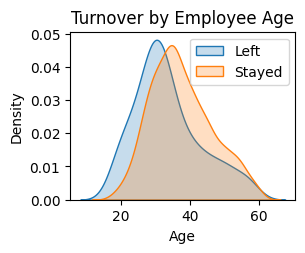

In [14]:
plt.subplot(2, 2, 1)
sns.kdeplot(data=data[data['Attrition'] == 'Yes'], x='Age', label='Left', fill=True)
sns.kdeplot(data=data[data['Attrition'] == 'No'], x='Age', label='Stayed', fill=True)
plt.title('Turnover by Employee Age')
plt.xlabel('Age')
plt.legend()

#### Plot Gender Turnover

Text(0, 0.5, 'Turnover Rate (%)')

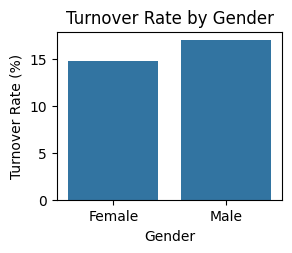

In [31]:
plt.subplot(2, 2, 2)
gender_turnover = get_turnover_by_category(data, 'Gender')
sns.barplot(data=gender_turnover, x='Gender', y='TurnoverRate')
plt.title('Turnover Rate by Gender')
plt.ylabel('Turnover Rate (%)')

#### Plot Education Turnover

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Below College'),
  Text(1, 0, 'College'),
  Text(2, 0, 'Bachelor'),
  Text(3, 0, 'Master'),
  Text(4, 0, 'Doctor')])

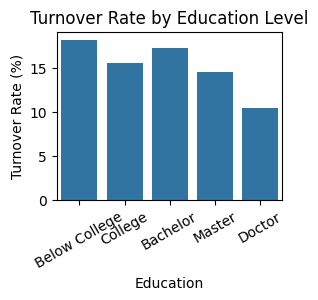

In [16]:
plt.subplot(2, 2, 3)
edu_turnover = get_turnover_by_category(data, 'Education')
edu_labels = {1: 'Below College', 2: 'College', 3: 'Bachelor', 4: 'Master', 5: 'Doctor'}
edu_turnover['Education'] = edu_turnover['Education'].map(edu_labels)
sns.barplot(data=edu_turnover, x='Education', y='TurnoverRate')
plt.title('Turnover Rate by Education Level')
plt.ylabel('Turnover Rate (%)')
plt.xticks(rotation=30)

#### Plot Department Turnover

([0, 1, 2],
 [Text(0, 0, 'Human Resources'),
  Text(1, 0, 'Research & Development'),
  Text(2, 0, 'Sales')])

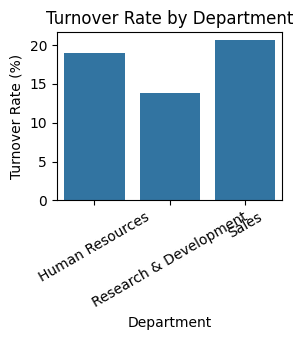

In [21]:
plt.subplot(2, 2, 4)
dept_turnover = get_turnover_by_category(data, 'Department')
sns.barplot(data=dept_turnover, x='Department', y='TurnoverRate')
plt.title('Turnover Rate by Department')
plt.ylabel('Turnover Rate (%)')
plt.xticks(rotation=30)

#### Plot Job Role Turnover

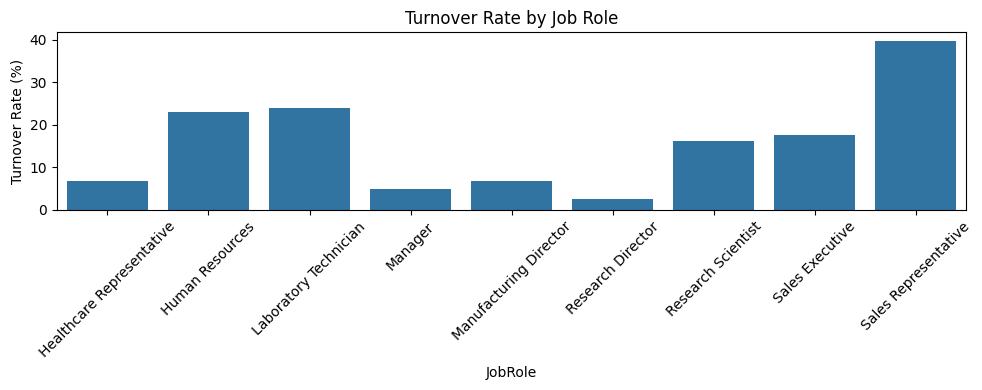

In [22]:
plt.figure(figsize=(10, 4))
role_turnover = get_turnover_by_category(data, 'JobRole')
sns.barplot(data=role_turnover, x='JobRole', y='TurnoverRate')
plt.title('Turnover Rate by Job Role')
plt.ylabel('Turnover Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Objective 2: Identify Key Factors Influencing Turnover
Goal: Investigate factors contributing to attrition, focusing on job involvement, work-life balance, monthly income, percent salary hike, and stock option level.

In [24]:
def turnover_by_factor(df, factor):
    counts = df.groupby([factor, 'Attrition']).size().unstack(fill_value=0)
    rate = (counts['Yes'] / (counts['Yes'] + counts['No'])) * 100
    return pd.DataFrame({factor: counts.index, 'TurnoverRate': rate})

#### Plot Job Involvement Turnover

Text(0, 0.5, 'Turnover Rate (%)')

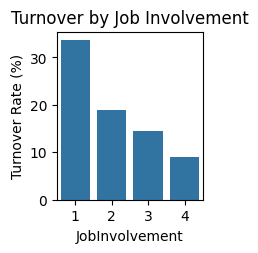

In [26]:
plt.subplot(2, 3, 1)
job_inv_turnover = turnover_by_factor(data, 'JobInvolvement')
sns.barplot(data=job_inv_turnover, x='JobInvolvement', y='TurnoverRate')
plt.title('Turnover by Job Involvement')
plt.ylabel('Turnover Rate (%)')

#### Plot Turnover by Work Balance

Text(0, 0.5, 'Turnover Rate (%)')

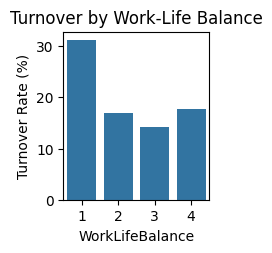

In [27]:
plt.subplot(2, 3, 2)
wlb_turnover = turnover_by_factor(data, 'WorkLifeBalance')
sns.barplot(data=wlb_turnover, x='WorkLifeBalance', y='TurnoverRate')
plt.title('Turnover by Work-Life Balance')
plt.ylabel('Turnover Rate (%)')

#### Plot Monthly Income vs Turnover

Text(0, 0.5, 'Monthly Income')

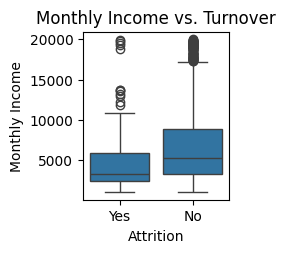

In [28]:
plt.subplot(2, 3, 3)
sns.boxplot(data=data, x='Attrition', y='MonthlyIncome')
plt.title('Monthly Income vs. Turnover')
plt.ylabel('Monthly Income')

#### Plot Salary Hike vs Turnover

Text(0, 0.5, 'Percent Salary Hike')

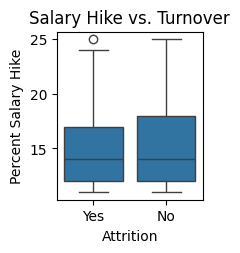

In [29]:
plt.subplot(2, 3, 4)
sns.boxplot(data=data, x='Attrition', y='PercentSalaryHike')
plt.title('Salary Hike vs. Turnover')
plt.ylabel('Percent Salary Hike')

#### Plot Turnover by Stock option Level

Text(0, 0.5, 'Turnover Rate (%)')

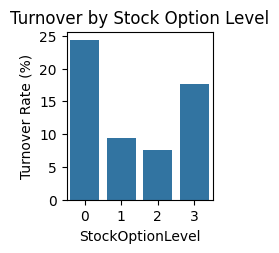

In [30]:
plt.subplot(2, 3, 5)
stock_turnover = turnover_by_factor(data, 'StockOptionLevel')
sns.barplot(data=stock_turnover, x='StockOptionLevel', y='TurnoverRate')
plt.title('Turnover by Stock Option Level')
plt.ylabel('Turnover Rate (%)')
